In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
salaries = pd.read_csv("Salaries.csv")
salaries.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_3684\2250023808.py:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Display the dimensions of the dataset


In [10]:
salaries.shape


(148654, 13)

# Statistical Summary of the Total pay

In [15]:
salaries[["TotalPay","TotalPayBenefits"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43


# Removing unnecessary columns

In [12]:
salaries = salaries.drop(columns=['Notes', 'Agency', 'Id', 'EmployeeName', 'Year',"Benefits"])
salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,NaN


# Data Cleaning:

In [18]:
options = ['BasePay','OvertimePay','OtherPay','TotalPay','TotalPayBenefits']
salaries[options] = salaries[options].apply(pd.to_numeric, errors='coerce')
salaries[salaries[options].gt(0).all(axis=1)]

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Status
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,NaN
5,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,316285.74,316285.74,NaN
...,...,...,...,...,...,...,...
147467,Publ Svc Aide-Asst to Prof,1182.12,487.38,44.03,1713.53,1730.66,PT
147535,Camp Assistant,1160.08,426.15,15.15,1601.38,1617.39,PT
147658,Custodial Assistant Supervisor,1282.97,36.66,49.85,1369.48,1383.17,PT
147659,Nurse Practitioner,426.44,273.24,431.56,1131.24,1380.03,PT


# Analyze Full-time vs Part-time Jobs

In [22]:
salaries_ft = salaries[salaries['Status'] == 'FT']
salaries_ft['TotalPay'].describe()

count     22334.000000
mean     103505.761053
std       40722.929492
min       26363.620000
25%       72355.500000
50%       94271.735000
75%      127856.000000
max      390111.980000
Name: TotalPay, dtype: float64

In [21]:
salaries_pt = salaries[salaries['Status'] == 'PT']
salaries_pt['TotalPay'].describe()

count     15785.000000
mean      35806.986627
std       37706.327998
min        -618.130000
25%        7355.400000
50%       22407.370000
75%       52986.740000
max      471952.640000
Name: TotalPay, dtype: float64

## Full-time jobs distribution

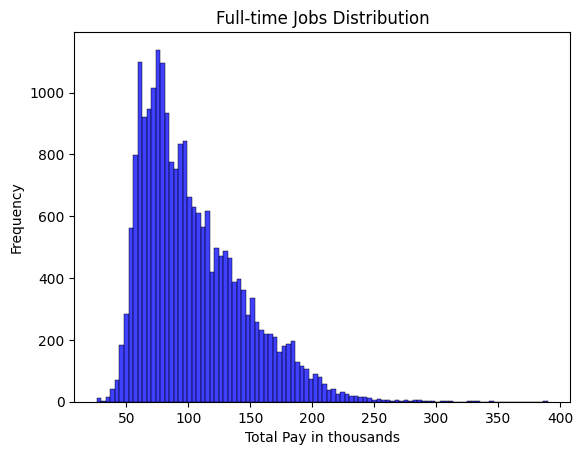

In [23]:
sns.histplot(salaries_ft['TotalPay'] / 1000, bins=100, color='blue', kde=False)
plt.title('Full-time Jobs Distribution')
plt.xlabel('Total Pay in thousands')
plt.ylabel('Frequency')
plt.show()

## Full-time jobs Boxplot

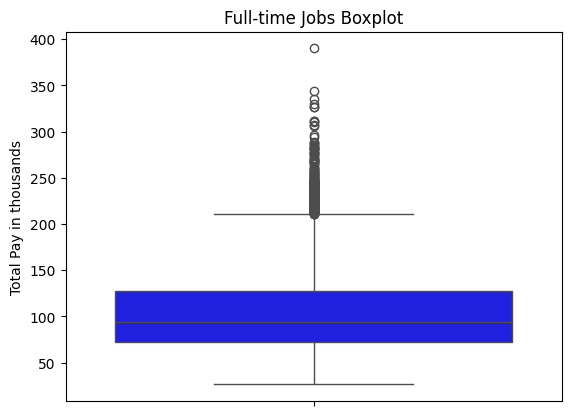

In [24]:
sns.boxplot(y=salaries_ft['TotalPay'] / 1000, color='blue')
plt.title('Full-time Jobs Boxplot')
plt.ylabel('Total Pay in thousands')
plt.show()

## Visualizing Part-time Jobs

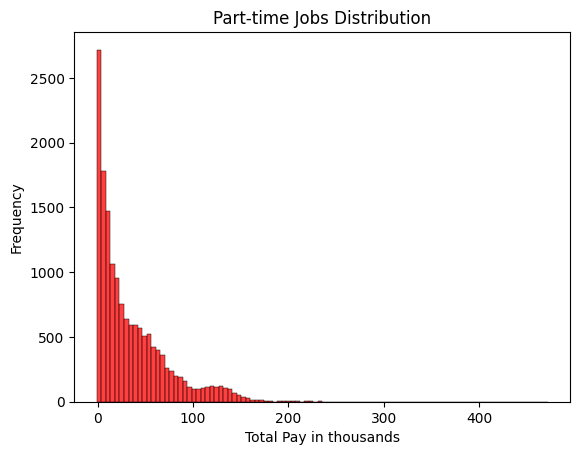

In [25]:
sns.histplot(salaries_pt['TotalPay'] / 1000, bins=100, color='red', kde=False)
plt.title('Part-time Jobs Distribution')
plt.xlabel('Total Pay in thousands')
plt.ylabel('Frequency')
plt.show()

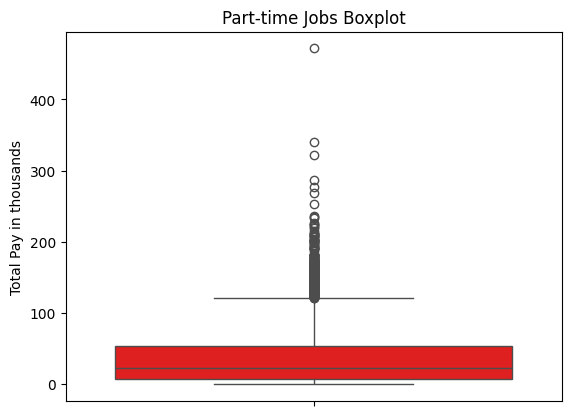

In [26]:
sns.boxplot(y=salaries_pt['TotalPay'] / 1000, color='red')
plt.title('Part-time Jobs Boxplot')
plt.ylabel('Total Pay in thousands')
plt.show()

# Handling Outliers

In [27]:
# Handling outliers for full-time jobs
salaries_ft = salaries_ft[(salaries_ft['TotalPay'] < salaries_ft['TotalPay'].mean() + 3 * salaries_ft['TotalPay'].std()) &
                          (salaries_ft['TotalPay'] > salaries_ft['TotalPay'].mean() - 3 * salaries_ft['TotalPay'].std())]

# Handling outliers for part-time jobs
salaries_pt = salaries_pt[(salaries_pt['TotalPay'] < salaries_pt['TotalPay'].mean() + 3 * salaries_pt['TotalPay'].std()) &
                          (salaries_pt['TotalPay'] > salaries_pt['TotalPay'].mean() - 3 * salaries_pt['TotalPay'].std())]

# Comparing Full-time and Part-time Jobs

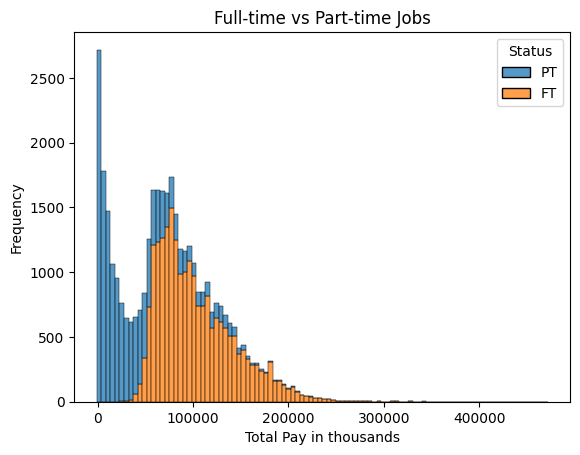

In [28]:
salaries = salaries.dropna(subset=['Status'])
sns.histplot(data=salaries, x='TotalPay', hue='Status', multiple="stack", bins=100)
plt.title('Full-time vs Part-time Jobs')
plt.xlabel('Total Pay in thousands')
plt.ylabel('Frequency')
plt.show()

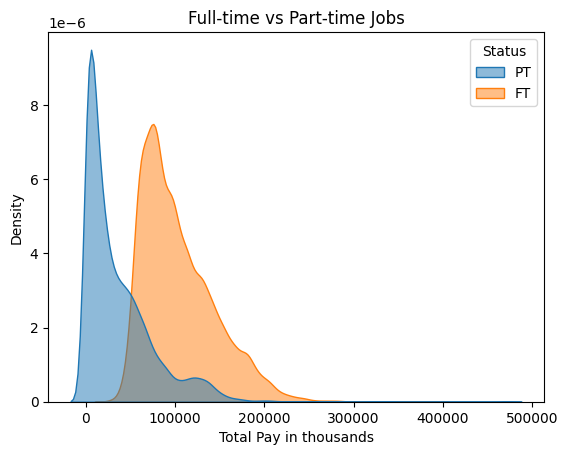

In [29]:
sns.kdeplot(data=salaries, x='TotalPay', hue='Status', fill=True, alpha=0.5)
plt.title('Full-time vs Part-time Jobs')
plt.xlabel('Total Pay in thousands')
plt.ylabel('Density')
plt.show()

# Conclusion
The average salary for full-time jobs is 107,000 and for part-time jobs is 31,000.This shows that full-time jobs have higher salaries compared to part-time jobs.